In [1]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt
import gzip
import pickle
import numpy as np
from sympl import get_constant

Rd = get_constant('gas_constant_of_dry_air', 'J kg^-1 K^-1')
Cp =\
    get_constant('heat_capacity_of_dry_air_at_constant_pressure',
                 'J kg^-1 K^-1')
g=get_constant('gravitational_acceleration',
                 'm s^-2') 

/home/data/miniconda3/lib/python3.8/site-packages/sympl/_core/dataarray.py:6: FutureWarning: xarray subclass DataArray should explicitly define __slots__
  class DataArray(xr.DataArray):


In [55]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv1', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/profilesv1', 'rb') as f:
    WXa, WYa, WZa, DXa, DYa, DZa, windxmean, windymean, windzmean, DSExmean, DSEymean, DSEzmean=pickle.load(f) 

def interpol1d(X):
    
    f = interpolate.interp1d([0,0.25,0.5,0.75,1], X)
    out=f([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
            
    return out


int_list=[]
dur_list=[]
ac_list=[]

for i in range(len(Rey[0])):

    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    ac_tot=convfh[i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)
    
    ac_list.append(ac_tot)


cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])


wx=[]
wy=[]
dx=[]
dy=[]
for i in range(len(int_list)):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):

        wx.append(WXa[i][:,:7].mean(axis=1))
        wy.append(WYa[i][:,:7].mean(axis=1))
        dx.append(DXa[i][:,:7].mean(axis=1))
        dy.append(DYa[i][:,:7].mean(axis=1))

wx1=[];wx2=[];wx3=[]
wy1=[];wy2=[];wy3=[]
dx1=[];dx2=[];dx3=[]
dy1=[];dy2=[];dy3=[]

# temp=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# print(temp[:3])
# print(temp[3:8])
# print(temp[8:])

for i in range(len(wx)):
    
    wxi=interpol1d(wx[i]);wyi=interpol1d(wy[i]);dxi=interpol1d(dx[i]);dyi=interpol1d(dy[i])
    wx1.append(wxi[:3].mean()); wx2.append(wxi[3:8].mean()); wx3.append(wxi[8:].mean())
    wy1.append(wyi[:3].mean()); wy2.append(wyi[3:8].mean()); wy3.append(wyi[8:].mean())
    dx1.append(dxi[:3].mean()); dx2.append(dxi[3:8].mean()); dx3.append(dxi[8:].mean())
    dy1.append(dyi[:3].mean()); dy2.append(dyi[3:8].mean()); dy3.append(dyi[8:].mean())

<IPython.core.display.Javascript object>


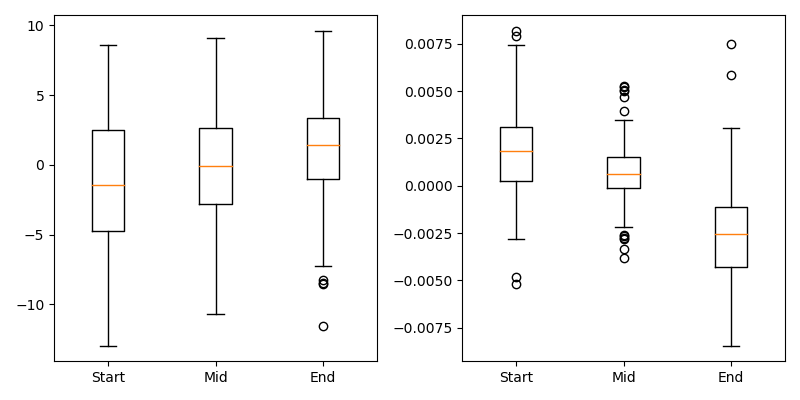

In [71]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
fig.set_size_inches(8, 4)

ax[0].boxplot([wx1, wx2, wx3])
ax[1].boxplot([-np.array(dx1), -np.array(dx2), -np.array(dx3)])

plt.xticks([1, 2, 3], ['Start', 'Mid', 'End'])
plt.tight_layout()

<IPython.core.display.Javascript object>


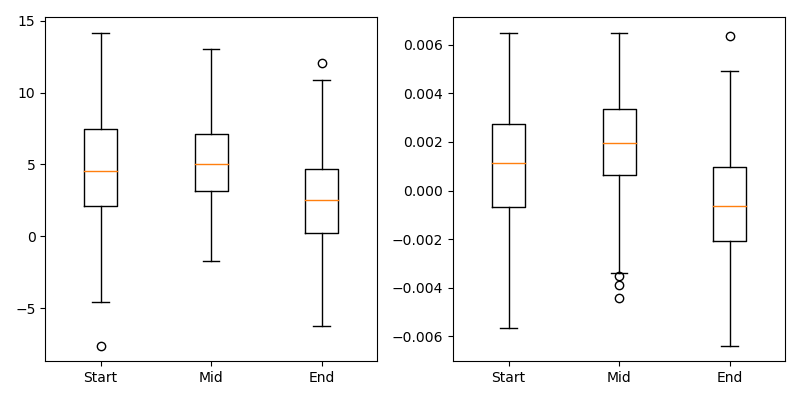

In [69]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
fig.set_size_inches(8, 4)

ax[0].boxplot([wy1, wy2, wy3])
ax[1].boxplot([dy1, dy2, dy3])

plt.xticks([1, 2, 3], ['Start', 'Mid', 'End'])
plt.tight_layout()